In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sbn

In [2]:
fiyat = np.random.randint(690,895,2000)
yıl = np.random.randint(2015,2020,2000)
km = np.random.randint(11000,78000,2000)
liste = list(zip(yıl,km,fiyat))
fytlist = pd.DataFrame(liste,columns =["ÜRETİM YILI", "KM BİLGİSİ (km)","FİYATI (TL)"])
fytlist


,ÜRETİM YILI,KM BİLGİSİ (km),FİYATI (TL)
0,2017,29147,842
1,2018,73925,796
2,2019,45049,881
3,2019,61865,787
4,2017,58836,762
...,...,...,...
1995,2017,77619,701
1996,2015,76798,808
1997,2018,14877,718
1998,2017,12151,799


# VERİYİ İKİYE BÖLELİM 

In [3]:
from sklearn.model_selection import train_test_split

In [4]:
# y = wx + b
# y--->label
y = fytlist["FİYATI (TL)"].values

# x --> feature (özellik)
x = fytlist[["KM BİLGİSİ (km)","ÜRETİM YILI"]]

In [8]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3,random_state = 20)

In [9]:
x_train.shape

(1400, 2)

In [10]:
x_test.shape

(600, 2)

In [11]:
#scaling yapalım
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(x_train)

MinMaxScaler(copy=True, feature_range=(0, 1))

In [12]:
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

In [14]:
import tensorflow as tf
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense

In [15]:
model = Sequential()
model.add(Dense(5,activation = "relu"))
model.add(Dense(10,activation = "relu"))
model.add(Dense(15,activation = "relu"))
model.add(Dense(2,activation = "relu"))
model.add(Dense(6,activation = "relu"))

model.add(Dense(1))
model.compile(optimizer = "rmsprop", loss = "mse")

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [16]:
model.fit(x_train,y_train,epochs = 100)

Epoch 1/100
1400/1400 [==============================] - 1s 423us/sample - loss: 633236.6754
Epoch 2/100
1400/1400 [==============================] - 0s 35us/sample - loss: 633164.6757
Epoch 3/100
1400/1400 [==============================] - 0s 32us/sample - loss: 633094.9282
Epoch 4/100
1400/1400 [==============================] - 0s 28us/sample - loss: 633025.1075
Epoch 5/100
1400/1400 [==============================] - 0s 28us/sample - loss: 632955.1725
Epoch 6/100
1400/1400 [==============================] - 0s 27us/sample - loss: 632885.3589
Epoch 7/100
1400/1400 [==============================] - 0s 27us/sample - loss: 632815.5675
Epoch 8/100
1400/1400 [==============================] - 0s 28us/sample - loss: 632745.8411
Epoch 9/100
1400/1400 [==============================] - 0s 29us/sample - loss: 632675.9946
Epoch 10/100
1400/1400 [==============================] - 0s 28us/sample - loss: 632606.1604
Epoch 11/100
1400/1400 [==============================] - 0s 27us/sample - los

1400/1400 [==============================] - 0s 28us/sample - loss: 627104.6118
Epoch 90/100
1400/1400 [==============================] - 0s 26us/sample - loss: 627035.1079
Epoch 91/100
1400/1400 [==============================] - 0s 27us/sample - loss: 626965.6011
Epoch 92/100
1400/1400 [==============================] - 0s 27us/sample - loss: 626896.0782
Epoch 93/100
1400/1400 [==============================] - 0s 26us/sample - loss: 626826.6532
Epoch 94/100
1400/1400 [==============================] - 0s 26us/sample - loss: 626757.1118
Epoch 95/100
1400/1400 [==============================] - 0s 28us/sample - loss: 626687.6639
Epoch 96/100
1400/1400 [==============================] - 0s 26us/sample - loss: 626618.2646
Epoch 97/100
1400/1400 [==============================] - 0s 26us/sample - loss: 626548.7407
Epoch 98/100
1400/1400 [==============================] - 0s 28us/sample - loss: 626479.3346
Epoch 99/100
1400/1400 [==============================] - 0s 26us/sample - loss: 62

In [17]:
 loss = model.history.history["loss"]

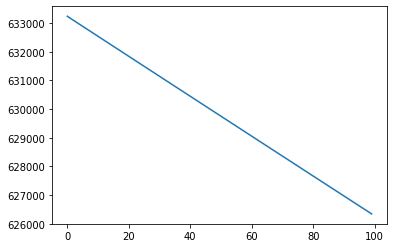

In [19]:
sbn.lineplot(x = range(len(loss)), y = loss)

In [20]:
egitim =model.evaluate(x_train,y_train, verbose = 0)

In [21]:
test = model.evaluate(x_test,y_test, verbose =0)

In [22]:
test #testin sonucu

622306.0633333334

In [23]:
egitim #modelin sonucu

626304.6932142858

In [24]:
trainloss = pd.Series(egitim)
testloss = pd.Series(test)


In [25]:
tahmin = model.predict(x_test)
gercek = y_test

In [26]:
tahmindf = pd.DataFrame(tahmin,columns =["TAHMİN"])
gercekdf = pd.DataFrame(gercek,columns =["GERCEK"])

topdf = pd.concat([tahmindf,gercekdf],axis = 1)

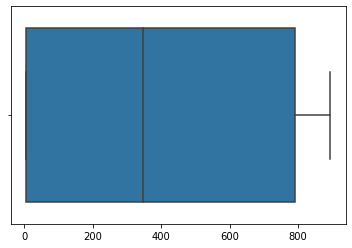

In [27]:
sbn.boxplot(topdf)

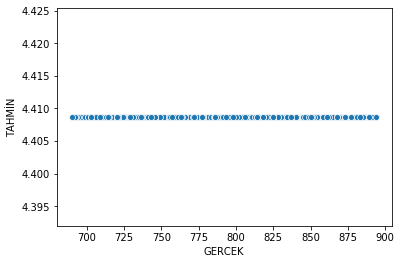

In [28]:
sbn.scatterplot(data =topdf,x="GERCEK",y="TAHMİN")

In [29]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [30]:
mean_squared_error(topdf["GERCEK"],topdf["TAHMİN"])

622306.0936370832

In [31]:
mean_absolute_error(topdf["GERCEK"],topdf["TAHMİN"])

786.6513271903991

In [33]:
topdf.describe()

,TAHMİN,GERCEK
count,600.000000,600.000000
mean,4.408687,791.060000
std,0.000014,59.089783
min,4.408673,690.000000
25%,4.408673,738.000000
50%,4.408673,791.500000
75%,4.408673,840.000000
max,4.408673,894.000000


In [34]:
np.std(topdf)

TAHMİN     0.000000
GERCEK    59.040521
dtype: float64

In [35]:
topdf

,TAHMİN,GERCEK
0,4.408673,881
1,4.408673,863
2,4.408673,781
3,4.408673,834
4,4.408673,764
...,...,...
595,4.408673,861
596,4.408673,690
597,4.408673,761
598,4.408673,763


In [36]:
yeni = [[2016,36332]] #yeni bir bisiklet fiyat tahmini

In [37]:
yeni= scaler.transform(yeni)


In [38]:
model.predict(yeni)

array([[4.408673]], dtype=float32)

In [39]:
# ŞİMDİ BU MODELİ KAYDEDELİM.
from tensorflow.keras.models import load_model

In [40]:
model.save("Fiyat.h5")

In [41]:
cagır  = load_model("Fiyat.h5")

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [42]:
cagır.predict(yeni)

array([[4.408673]], dtype=float32)